# Visualizing RMS Grid datasets in the sandbox

First we import the necessary modules:

In [1]:
import os,sys
#set the path to the Sandbox repository
sys.path.append('../../../sandbox')
#import the sandbox
import sandbox as sb
import matplotlib.pyplot as plt

Freenect module not found, KinectV1 will not work.


../../../sandbox\sandbox.py:52: UserWarning: gempy not found, GeoMap Module will not work
  warn('gempy not found, GeoMap Module will not work')


## Block Module
The Sandbox.BlockModule class contains all necessary methods to visualize RMS grid data. In the following steps we will create an instance of the module and load one or more RMS grids from VIP Datasets. Furthermore we will call methods to specify a custom colorbar and range for some datasets. 
For now the dimensions of the RMS grid are scaled to the dimensions of the sandbox, so if you need for example a larger vertical block size, adjust the vertical range accordingly. The horizontal aspect ratio of the sandbox is 1.2:1. Any model with a similar aspect ratio should look just fine. 

In [2]:
#instantiate the block module module to display RMS Grids:
module = sb.RMS_Grid()

In [3]:
# specify path to the folder where the grids are stored: 
#grid_folder='/Users/simon/Documents/Equinor/grids/'
grid_folder='/Users/Admin/PycharmProjects/open_AR_Sandbox/grids_do_not_push/'

#load a dataset 
module.load_model_vip(grid_folder+'VIP_for_UKA.corp')

#optional: load an additional block file and append it to the loaded dataset:
#you can import multiple datasets as long as they share the model dimensions nx,ny,nz.

additional_block_file=open(grid_folder+'VIP_ntg_fluid.fluid.inc', 'r')
module.parse_block_vip(additional_block_file, module.block_dict,"fluid", module.nx, module.ny, module.nz)

additional_block_file=open(grid_folder+'VIP_ntg_fluid.ntg.inc', 'r')
module.parse_block_vip(additional_block_file, module.block_dict,"ntg", module.nx, module.ny, module.nz)

#show the loaded datasets:
module.block_dict.keys()

nx ny, nz:
120 166 105
loading cell positions
processing coordinates in layer 0
processing coordinates in layer 1
processing coordinates in layer 2
processing coordinates in layer 3
processing coordinates in layer 4
processing coordinates in layer 5
processing coordinates in layer 6
processing coordinates in layer 7
processing coordinates in layer 8
processing coordinates in layer 9
processing coordinates in layer 10
processing coordinates in layer 11
processing coordinates in layer 12
processing coordinates in layer 13
processing coordinates in layer 14
processing coordinates in layer 15
processing coordinates in layer 16
processing coordinates in layer 17
processing coordinates in layer 18
processing coordinates in layer 19
processing coordinates in layer 20
processing coordinates in layer 21
processing coordinates in layer 22
processing coordinates in layer 23
processing coordinates in layer 24
processing coordinates in layer 25
processing coordinates in layer 26
processing coordina

dict_keys(['mask', 'FaultBlock', 'Zone', 'fluid', 'ntg'])

## create reservoir topography map


In [4]:
module.create_reservoir_topo()

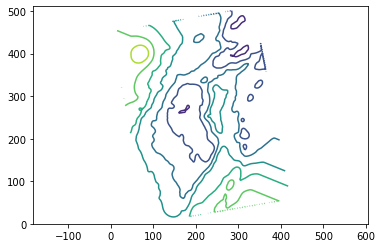

In [5]:
#preview the reservoir topography:
plt.axis('equal')
plt.contour(module.reservoir_topography)

## convert to a regular grid
interpolate and convert the irregular RMS grids into a regular grid. 
The default values for the regridding are the native resolution of the kinect and 100 depth levels. you can change the defaults by setting module.regridding_resolution, e.g. for testing (lower resolution will calculate a bit faster).

This task will run for several minutes per dataset.

In [ ]:
module.regridding_resolution = [424,512,2*module.nz] 
module.convert_to_regular_grid()

In [ ]:
# preview a slice from the dataset
depth = 50
key = 'mask'

block=module.regular_grid_dict[key]
plt.axis('equal')
plt.pcolormesh(block[:,:,depth])

In [ ]:
block=module.block_dict[key]
plt.axis('equal')
plt.pcolormesh(block[:,:,depth])

## save dataset
We save the caalculated regular grid to a file so conversion have to be done only once per dataset. 
The file can be loaded into the Sandbox with BlockModule.load_model(filename). 

In [ ]:
# save dataset to file
module.save(grid_folder+"VIP_for_UKA_linear.pickle")